#### Basic data preparation for the end to end run in notebook 4. The process is more or less a more stringent copy of the one in notebook 2 so I outsourced it for better readability and focus in notebook 4.

In [1]:
import numpy as np
import pandas as pd
import datetime
from tqdm import tqdm, tqdm_notebook

import funCleaning, funEDA

from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# display all columns of df
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 80

In [2]:
churn = pd.read_csv('data/churnDataWithDistances.csv', low_memory=False)

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56778 entries, 0 to 56777
Data columns (total 82 columns):
car_nr                           56778 non-null float64
ref_dt                           56778 non-null object
target_event                     56778 non-null object
NUM_CONSEC_SERVICES              56778 non-null int64
SUM_INVOICE_AMOUNT_IN_SERVICE    56778 non-null float64
SUM_INVOICE_AMOUNT               56778 non-null float64
NUM_EVENTS                       56778 non-null int64
FIRST_EVT                        56778 non-null object
LAST_EVT                         56778 non-null object
LAST_MILEAGE                     56777 non-null float64
MEAN_MILEAGE_PER_MNTH            56778 non-null float64
AVG_DIFF_MNTH                    56778 non-null int64
age_mnth                         56778 non-null int64
KANTON_LICENCE_PLATE             55490 non-null object
INSPECTION_INTERVAL_UID          56778 non-null object
LIST_PRICE                       56777 non-null float64
END_CUSTO

In [4]:
colsToDel = ['car_nr', 'ref_dt', 'ACCIDENT_CAR', 'DESCRIPTION_DE', 'DESCRIPTION_DE2', 'BUDGET_TYPE_IMPORT', 'SALES_TYPE_IMPORT', 
             'FUNCTION_TYPE_UID', 'TITLE', 'POSITION', 'EVT_BIRTH', 'NAME', 'PERSON_CITY', 'SECTOR_UID', 'IS_RETAIL_PARTNER', 
             'IS_SERVICE_PARTNER', 'RATING_UID', 'PARTNER_ADRESS_TYPE_UID', 'Altersklasse5J', 'Kanton', 'CAR_OWNER_JOIN_NR',
             'WEMFWirtschaftsgebiet', 'PERSON_STREET', 'PERSON_ZIP_CODE', 'PARTNER_STREET', 'PARTNER_ZIP_CODE', 'PARTNER_LAT',
             'PARTNER_LNG', 'PARTNER_ADDRESS', 'PARTNER_COMPANY_NR', 'Sprachregion']

churn = funCleaning.delCols(churn, colsToDel=colsToDel)

'car_nr successfully deleted'

'ref_dt successfully deleted'

'ACCIDENT_CAR successfully deleted'

'DESCRIPTION_DE successfully deleted'

'DESCRIPTION_DE2 successfully deleted'

'BUDGET_TYPE_IMPORT successfully deleted'

'SALES_TYPE_IMPORT successfully deleted'

'FUNCTION_TYPE_UID successfully deleted'

'TITLE successfully deleted'

'POSITION successfully deleted'

'EVT_BIRTH successfully deleted'

'NAME successfully deleted'

'PERSON_CITY successfully deleted'

'SECTOR_UID successfully deleted'

'IS_RETAIL_PARTNER successfully deleted'

'IS_SERVICE_PARTNER successfully deleted'

'RATING_UID successfully deleted'

'PARTNER_ADRESS_TYPE_UID successfully deleted'

'Altersklasse5J successfully deleted'

'Kanton successfully deleted'

'CAR_OWNER_JOIN_NR successfully deleted'

'WEMFWirtschaftsgebiet successfully deleted'

'PERSON_STREET successfully deleted'

'PERSON_ZIP_CODE successfully deleted'

'PARTNER_STREET successfully deleted'

'PARTNER_ZIP_CODE successfully deleted'

'PARTNER_LAT successfully deleted'

'PARTNER_LNG successfully deleted'

'PARTNER_ADDRESS successfully deleted'

'PARTNER_COMPANY_NR successfully deleted'

'Sprachregion successfully deleted'

In [5]:
colsToDt = ['FIRST_EVT', 'LAST_EVT']
colsToCat = ['target_event', 'CAR_BRAND_UID', 'GEAR_TYPE_UID', 'FUEL_TYPE_UID','WHEEL_DRIVE_UID', 'PERSON_LANGUAGE_UID', 
            'PARTNER_LANGUAGE_UID', 'ACTIVE', 'IS_PREFERRED_PARTNER', 'IS_DEALER', 'PARTNER_CITY', 'KANTON_LICENCE_PLATE', 
            'BASE_MARGIN', 'GEAR_COUNT', 'PERSON_ADRESS_COUNT', 'NUMBER_OF_DOORS_UID', 'PARTNER_ADRESS_COUNT', 'PARTNER_STATE',
            'INSPECTION_INTERVAL_UID', 'END_CUSTOMER_STATUS_UID', 'PERSON_STATE', 'REGION_UID'] + list(churn.columns[-14:-3])

churn = funCleaning.fixDtypes(churn, colsToCat=colsToCat, colsToDt=colsToDt, dtPattern="%Y/%m/%d")

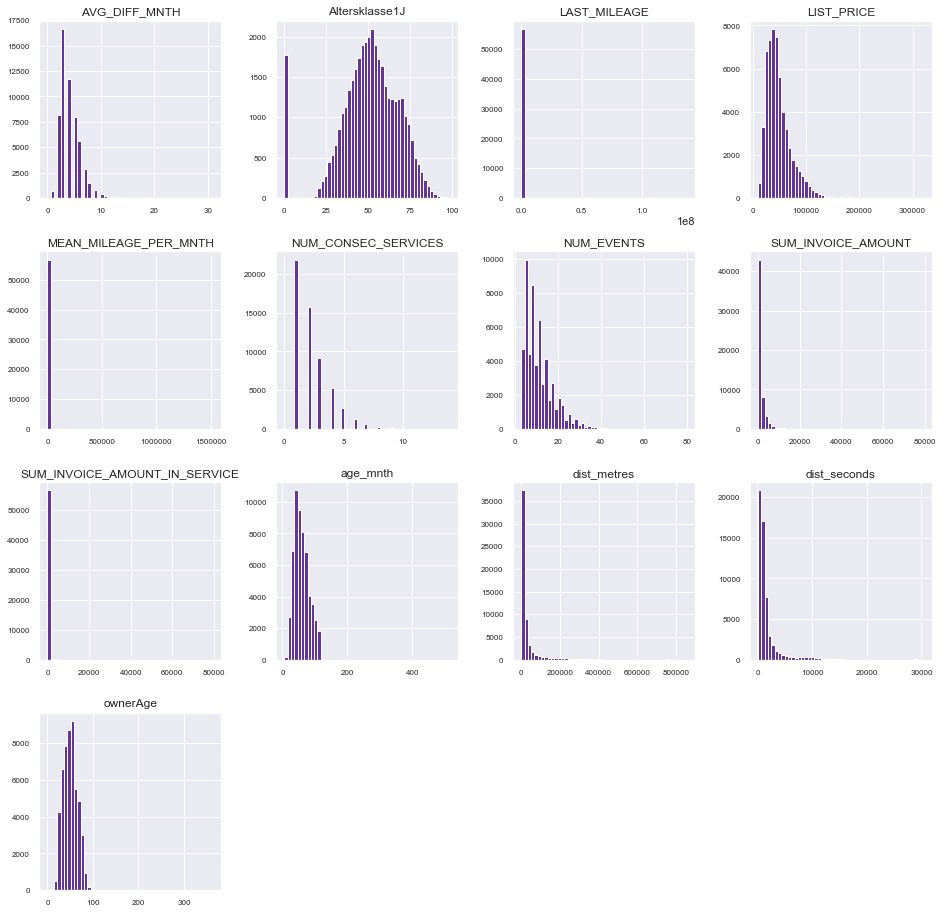

In [6]:
funEDA.histDF(churn);

In [7]:
def funCleanNumericals(df):
    df['SUM_INVOICE_AMOUNT'].replace(0.0, np.NaN, inplace=True)
    # replacing ownerAge where implausible with Altersklasse 1J, setting age 0 to NaN
    df['ownerAge'] = np.where((df['ownerAge'] >= 90) | (df['ownerAge'] < 18) | (df['ownerAge'].isnull()), 
                              df['Altersklasse1J'], df['ownerAge'])
    df['ownerAge'].replace(0.0, np.NaN, inplace=True)
    df = df[df['age_mnth'] <= 96]
    return df

In [8]:
for col in ['SUM_INVOICE_AMOUNT_IN_SERVICE', 'Altersklasse1J', 'dist_seconds']:
    colsToDel.append(col)

churn = funCleanNumericals(churn)
churn = funCleaning.delCols(churn, colsToDel=colsToDel)

'SUM_INVOICE_AMOUNT_IN_SERVICE successfully deleted'

'Altersklasse1J successfully deleted'

'dist_seconds successfully deleted'

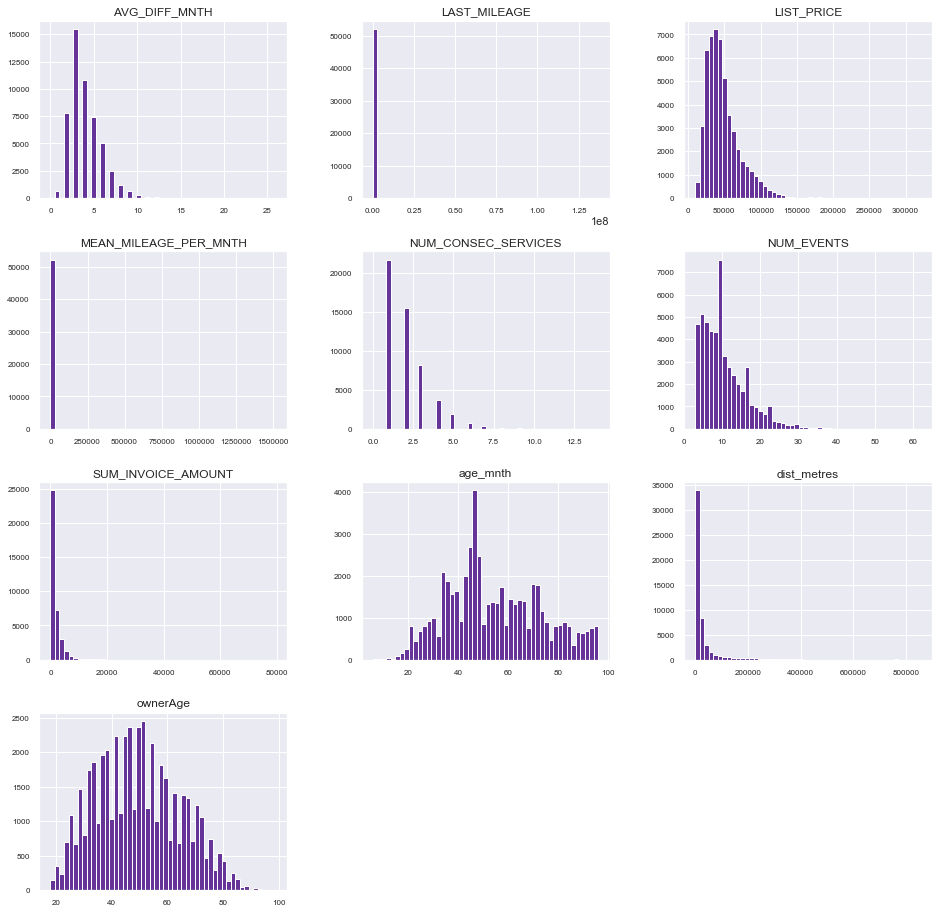

In [9]:
funEDA.histDF(churn);

In [10]:
funCleaning.outlierDetectionIQR(churn, dist=7)

NUM_CONSEC_SERVICES
Identified outliers: 0
Percentage of outliers: 0.0%

SUM_INVOICE_AMOUNT
Identified outliers: 48
Percentage of outliers: 0.1%

NUM_EVENTS
Identified outliers: 0
Percentage of outliers: 0.0%

LAST_MILEAGE
Identified outliers: 78
Percentage of outliers: 0.1%

MEAN_MILEAGE_PER_MNTH
Identified outliers: 107
Percentage of outliers: 0.2%

AVG_DIFF_MNTH
Identified outliers: 17
Percentage of outliers: 0.0%

age_mnth
Identified outliers: 0
Percentage of outliers: 0.0%

LIST_PRICE
Identified outliers: 25
Percentage of outliers: 0.0%

ownerAge
Identified outliers: 0
Percentage of outliers: 0.0%

dist_metres
Identified outliers: 1920
Percentage of outliers: 3.7%



In [11]:
funCleaning.outlierRemovalIQR(churn, dist=7)

NUM_CONSEC_SERVICES
Outliers removed: 0

SUM_INVOICE_AMOUNT
Outliers removed: 48

NUM_EVENTS
Outliers removed: 0

LAST_MILEAGE
Outliers removed: 78

MEAN_MILEAGE_PER_MNTH
Outliers removed: 38

AVG_DIFF_MNTH
Outliers removed: 17

age_mnth
Outliers removed: 0

LIST_PRICE
Outliers removed: 24

ownerAge
Outliers removed: 0

dist_metres
Outliers removed: 1916



,target_event,NUM_CONSEC_SERVICES,SUM_INVOICE_AMOUNT,NUM_EVENTS,FIRST_EVT,LAST_EVT,LAST_MILEAGE,MEAN_MILEAGE_PER_MNTH,AVG_DIFF_MNTH,age_mnth,KANTON_LICENCE_PLATE,INSPECTION_INTERVAL_UID,LIST_PRICE,END_CUSTOMER_STATUS_UID,CAR_BRAND_UID,FUEL_TYPE_UID,GEAR_TYPE_UID,WHEEL_DRIVE_UID,NUMBER_OF_DOORS_UID,GEAR_COUNT,EXTERIOR_COLOR_DE,INTERIOR_COLOR_DE,BASE_MARGIN,SALES_TYPE,PERSON_LANGUAGE_UID,PERSON_STATE,PERSON_ADRESS_COUNT,ownerAge,ACTIVE,REGION_UID,PARTNER_LANGUAGE_UID,IS_PREFERRED_PARTNER,IS_DEALER,PARTNER_STATE,PARTNER_CITY,PARTNER_ADRESS_COUNT,Haushaltstyp,Urbanitaet,Wohneigentumverhaeltnis,Haushaltsgroesse,KaufkraftindexGemeinde,Fahrzeugtyp,Haushaltseinkommen,Fahrzeugklasse,Lebensphase,HaushaltsgroesseFein,Fahrzeugart,dist_metres
0,CHURN,1,286.45,8,2009-02-23,2014-04-08,79790.0,1286.935484,7,79,SH,24 Monate,21300.0,26 KMU Privatkunde,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,5.0,5.0,Schwarz,Stoff Maxima anthrazit,9.00,Polo,Deutsch,SH,2.0,22.0,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,1,1,1,1.0,4.0,0,0.0,0,2,1.0,0.0,2805.0
1,ACTIVE,5,NaN,10,2009-02-24,2014-08-04,48670.0,737.424242,6,82,SH,24 Monate,21300.0,26 KMU Privatkunde,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,5.0,5.0,Schwarz,Stoff Maxima anthrazit,9.00,Polo,Deutsch,SH,2.0,56.0,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,2,1,1,2.0,4.0,4,2.0,4,6,2.0,6.0,2805.0
2,CHURN,1,NaN,5,2009-02-23,2014-06-06,53000.0,828.125000,12,86,SH,12 Monate,21300.0,26 KMU Privatkunde,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,5.0,5.0,Schwarz,Stoff Maxima anthrazit,9.00,Polo,Deutsch,SH,1.0,NaN,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2805.0
3,CHURN,1,NaN,6,2009-02-26,2014-10-13,49000.0,720.588235,11,90,SH,24 Monate,21300.0,26 KMU Privatkunde,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,5.0,5.0,Schwarz,Stoff Maxima anthrazit,9.00,Polo,Deutsch,SH,1.0,25.0,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2805.0
4,CHURN,3,NaN,14,2009-10-13,2014-01-29,56145.0,1100.882353,3,73,SH,24 Monate,43920.0,52 Privat Kleinflottenfirma,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,3.0,6.0,Shadowblue Metallic,Titanschwarz,10.00,Scirocco,Deutsch,SH,1.0,36.0,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2805.0
5,ACTIVE,4,453.75,22,2009-10-09,2015-06-23,51481.0,757.073529,3,72,SH,24 Monate,73890.0,53 Privat Grossflottenfirma,Audi,Benzin,Automat,Allradantrieb,5.0,7.0,eissilber metallic,schwarz / Himmel silber,7.00,A4 Avant,Deutsch,SH,2.0,57.0,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,2,1,,4.0,4.0,4,5.0,3,6,4.0,6.0,2805.0
6,ACTIVE,3,989.45,22,2010-02-28,2015-12-28,19188.0,274.114286,3,75,SH,24 Monate,22670.0,26 KMU Privatkunde,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,5.0,5.0,Deepblack Perleffekt,Stoff Metric Titanschwarz,9.00,Polo,Deutsch,SH,2.0,88.0,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,2,1,,4.0,4.0,4,4.0,4,8,4.0,6.0,2805.0
7,ACTIVE,3,763.00,22,2009-10-13,2017-01-17,76475.0,879.022988,3,88,SH,24 Monate,34870.0,52 Privat Kleinflottenfirma,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,3.0,6.0,Reflexsilber Metallic,Stoff Titanschwarz,10.00,Golf,Deutsch,SH,2.0,58.0,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,2,1,,1.0,4.0,0,3.0,0,5,1.0,0.0,2805.0
8,CHURN,2,NaN,9,2009-04-23,2014-10-02,131396.0,1990.848485,7,88,SH,24 Monate,63440.0,53 Privat Grossflottenfirma,VW-PW,Benzin,Automat,Allradantrieb,5.0,6.0,Deepblack Perleffekt,Leder Vienna titanschwarz,10.00,Tiguan,Deutsch,SH,2.0,47.0,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,3,1,4,3.0,4.0,4,5.0,4,4,3.0,6.0,2805.0
9,CHURN,3,NaN,8,2010-02-28,2014-10-01,71119.0,1269.982143,7,78,SH,24 Monate,25870.0,26 KMU Privatkunde,VW-PW,Benzin,Automat,Frontantrieb,5.0,7.0,Deepblack Perleffekt,Stoff Metric Titanschwarz,9.00,Polo,Deutsch,SH,1.0,NaN,1,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2805.0


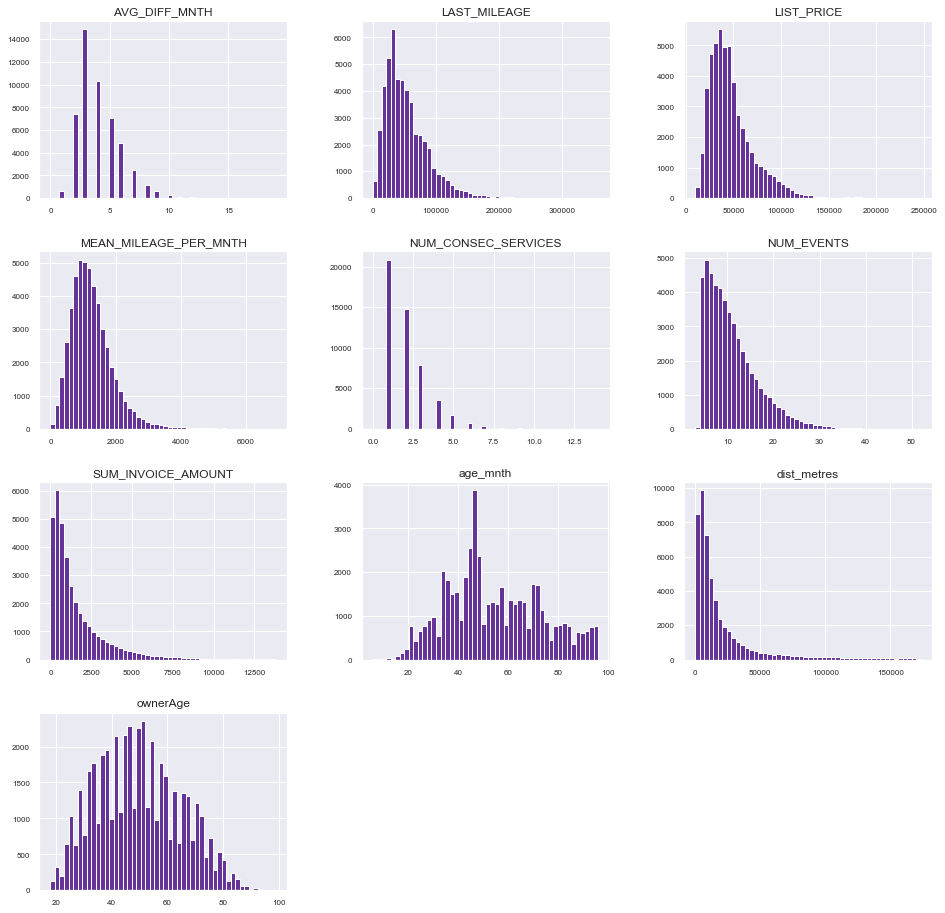

In [12]:
funEDA.histDF(churn);

In [13]:
churn = churn[churn['ACTIVE'] == 1]
churn['target_event'] = churn['target_event'].map({'ACTIVE':0, 'CHURN':1}).astype(np.int64)

In [14]:
for col in ['ACTIVE', 'KANTON_LICENCE_PLATE']:
    colsToDel.append(col)

In [15]:
churn = funCleaning.delCols(churn, colsToDel=colsToDel)

'ACTIVE successfully deleted'

'KANTON_LICENCE_PLATE successfully deleted'

In [16]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49846 entries, 0 to 56777
Data columns (total 46 columns):
target_event               49846 non-null int64
NUM_CONSEC_SERVICES        49846 non-null int64
SUM_INVOICE_AMOUNT         35792 non-null float64
NUM_EVENTS                 49846 non-null int64
FIRST_EVT                  49846 non-null datetime64[ns]
LAST_EVT                   49846 non-null datetime64[ns]
LAST_MILEAGE               49845 non-null float64
MEAN_MILEAGE_PER_MNTH      49846 non-null float64
AVG_DIFF_MNTH              49846 non-null int64
age_mnth                   49846 non-null int64
INSPECTION_INTERVAL_UID    49846 non-null category
LIST_PRICE                 49845 non-null float64
END_CUSTOMER_STATUS_UID    49845 non-null category
CAR_BRAND_UID              49846 non-null category
FUEL_TYPE_UID              49845 non-null category
GEAR_TYPE_UID              49845 non-null category
WHEEL_DRIVE_UID            49845 non-null category
NUMBER_OF_DOORS_UID        4883

In [17]:
# create a new numerical variable 'duration_days'
churn['duration_days'] = churn['LAST_EVT'] - churn['FIRST_EVT']
churn['duration_days'] = churn['duration_days'].astype(str).str.split().str.get(0).astype(np.int64)

In [18]:
churn.head()

,target_event,NUM_CONSEC_SERVICES,SUM_INVOICE_AMOUNT,NUM_EVENTS,FIRST_EVT,LAST_EVT,LAST_MILEAGE,MEAN_MILEAGE_PER_MNTH,AVG_DIFF_MNTH,age_mnth,INSPECTION_INTERVAL_UID,LIST_PRICE,END_CUSTOMER_STATUS_UID,CAR_BRAND_UID,FUEL_TYPE_UID,GEAR_TYPE_UID,WHEEL_DRIVE_UID,NUMBER_OF_DOORS_UID,GEAR_COUNT,EXTERIOR_COLOR_DE,INTERIOR_COLOR_DE,BASE_MARGIN,SALES_TYPE,PERSON_LANGUAGE_UID,PERSON_STATE,PERSON_ADRESS_COUNT,ownerAge,REGION_UID,PARTNER_LANGUAGE_UID,IS_PREFERRED_PARTNER,IS_DEALER,PARTNER_STATE,PARTNER_CITY,PARTNER_ADRESS_COUNT,Haushaltstyp,Urbanitaet,Wohneigentumverhaeltnis,Haushaltsgroesse,KaufkraftindexGemeinde,Fahrzeugtyp,Haushaltseinkommen,Fahrzeugklasse,Lebensphase,HaushaltsgroesseFein,Fahrzeugart,dist_metres,duration_days
0,1,1,286.45,8,2009-02-23,2014-04-08,79790.0,1286.935484,7,79,24 Monate,21300.0,26 KMU Privatkunde,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,5.0,5.0,Schwarz,Stoff Maxima anthrazit,9.0,Polo,Deutsch,SH,2.0,22.0,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,1,1,1,1.0,4.0,0,0.0,0,2,1.0,0.0,2805.0,1870
1,0,5,NaN,10,2009-02-24,2014-08-04,48670.0,737.424242,6,82,24 Monate,21300.0,26 KMU Privatkunde,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,5.0,5.0,Schwarz,Stoff Maxima anthrazit,9.0,Polo,Deutsch,SH,2.0,56.0,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,2,1,1,2.0,4.0,4,2.0,4,6,2.0,6.0,2805.0,1987
2,1,1,NaN,5,2009-02-23,2014-06-06,53000.0,828.125000,12,86,12 Monate,21300.0,26 KMU Privatkunde,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,5.0,5.0,Schwarz,Stoff Maxima anthrazit,9.0,Polo,Deutsch,SH,1.0,NaN,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2805.0,1929
3,1,1,NaN,6,2009-02-26,2014-10-13,49000.0,720.588235,11,90,24 Monate,21300.0,26 KMU Privatkunde,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,5.0,5.0,Schwarz,Stoff Maxima anthrazit,9.0,Polo,Deutsch,SH,1.0,25.0,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2805.0,2055
4,1,3,NaN,14,2009-10-13,2014-01-29,56145.0,1100.882353,3,73,24 Monate,43920.0,52 Privat Kleinflottenfirma,VW-PW,Benzin,Schaltgetriebe,Frontantrieb,3.0,6.0,Shadowblue Metallic,Titanschwarz,10.0,Scirocco,Deutsch,SH,1.0,36.0,Ostschweiz,Deutsch,0,1,SH,Schaffhausen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2805.0,1569


In [19]:
# drop datetime columns as they are no longer needed
for col in ['LAST_EVT', 'FIRST_EVT']:
    colsToDel.append(col)
    
churn = funCleaning.delCols(churn, colsToDel=colsToDel)

'LAST_EVT successfully deleted'

'FIRST_EVT successfully deleted'

In [20]:
def funCleanStrings(df):
    df['SALES_TYPE'] = df['SALES_TYPE'].str.split(' ').str.get(0)
    df['SALES_TYPE'] = df['SALES_TYPE'].astype('category')
    return df

In [21]:
for col in ['EXTERIOR_COLOR_DE', 'INTERIOR_COLOR_DE']:
    colsToDel.append(col)

churn = funCleanStrings(churn)
churn = funCleaning.delCols(churn, colsToDel=colsToDel)

assert list(churn.select_dtypes(include = ['object']).columns) == []

'EXTERIOR_COLOR_DE successfully deleted'

'INTERIOR_COLOR_DE successfully deleted'

In [22]:
def funCleanMissingStates(df):
    # set missing partner states to "FL"
    df['PARTNER_STATE'] = np.where((df['PARTNER_STATE'].isnull()),"FL", df['PARTNER_STATE'])
    # set missing customer state = partner state where distance to partner < 20 km
    df['PERSON_STATE'] = np.where((df['PERSON_STATE'].isnull()) & (df['dist_metres'] <= (20000)),
                                                                      df['PARTNER_STATE'], df['PERSON_STATE'])
    df[['PARTNER_STATE', 'PERSON_STATE']] = df[['PARTNER_STATE', 'PERSON_STATE']].astype('category')
    return df

In [23]:
funCleanMissingStates(churn);

In [24]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49846 entries, 0 to 56777
Data columns (total 43 columns):
target_event               49846 non-null int64
NUM_CONSEC_SERVICES        49846 non-null int64
SUM_INVOICE_AMOUNT         35792 non-null float64
NUM_EVENTS                 49846 non-null int64
LAST_MILEAGE               49845 non-null float64
MEAN_MILEAGE_PER_MNTH      49846 non-null float64
AVG_DIFF_MNTH              49846 non-null int64
age_mnth                   49846 non-null int64
INSPECTION_INTERVAL_UID    49846 non-null category
LIST_PRICE                 49845 non-null float64
END_CUSTOMER_STATUS_UID    49845 non-null category
CAR_BRAND_UID              49846 non-null category
FUEL_TYPE_UID              49845 non-null category
GEAR_TYPE_UID              49845 non-null category
WHEEL_DRIVE_UID            49845 non-null category
NUMBER_OF_DOORS_UID        48838 non-null category
GEAR_COUNT                 49845 non-null category
BASE_MARGIN                49846 non-null c

In [25]:
churn.to_csv('data/churnDataPrepared.csv', index=False)

---